# Proyecto Final
## Jason Rodriguez
## Percy Herrera

El set de datos es sobre informacion de campana de recoleccion de dineros de cuentas en mora, es la informacion sobre clientes contactados, con una oferta concreta para cerrar su cuenta en mora por un monto inferior al actual.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set()

In [2]:
df1 = pd.read_csv('proyectoF1T.csv')
df2 = pd.read_csv('proyectoF2F.csv')
print(df1.shape)
df1.head()

(2595, 31)


,id,approval_amount,recommendation,redeem_ts,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,state,city,...,account_payment_method,collections_category,days_past_due,number_of_payments,amount_financed,data_correction,merchant_id,source,initial_decision,last_payment_amount
0,503603788,250.0,APPROVE,2019-01-24 09:50:41.115000,False,NaN,2019-01-24 09:36:27.784000,1988-05-21,CO,Aurora,...,MANUAL,NaN,0,52,NaN,False,14206566,MERCHANT,APPROVED,70.34
1,399999590,80.0,APPROVE,2019-01-24 17:34:47.768000,False,2019-01-24 12:16:54.626000,NaN,1998-01-13,TX,Weatherford,...,MANUAL,NaN,0,26,0.0,False,107313386,INTERNET,APPROVED,NaN
2,330633304,956.0,APPROVE,2019-01-24 18:18:53.120000,False,2019-01-24 13:17:29.359000,2019-01-24 13:15:59.087000,1975-12-09,WA,Othello,...,MANUAL,NaN,0,12,0.0,False,230266536,MERCHANT,APPROVED,NaN
3,422247835,9.0,APPROVE,2019-01-24 18:36:06.694000,False,NaN,2019-01-24 13:19:17.988000,1985-09-09,CA,Imperial,...,MANUAL,NaN,0,26,0.0,False,332752404,MERCHANT,APPROVED,NaN
4,427183074,250.0,APPROVE,2019-01-25 08:47:49.726000,False,2019-01-24 09:08:46.690000,2019-01-24 09:08:20.447000,1980-11-23,OH,Cleveland,...,MANUAL,NaN,0,26,0.0,False,358414568,MERCHANT,APPROVED,NaN


# Preprocesado de la data

Ahora necesitamos procesar los dos dataframes para unirlos y eliminar algunas columnas para lograr una primera version del set de datos lo suficientemente simple para empezar nuestros analysis e ir agregando columnda y datos conforme necesitemos.

In [3]:
In [13]: df1 = df1.append(df2)
df2 = None    
print(df1.shape)

(6095, 31)


In [4]:
dfp = df1.filter(['approval_amount','contacted','email_contacted_ts','sms_contacted_ts'
                  ,'birth_dt','rent_or_own','months_at_current_residence','years_at_current_residence'
                  ,'direct_deposit','black_listed','language_preference','military_applicant'
                  ,'scheduled_payment_amt','number_of_payments','initial_decision','last_payment_amount'], axis=1)
print(dfp.shape)
dfp.head()

(6095, 16)


,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision,last_payment_amount
0,250.0,False,NaN,2019-01-24 09:36:27.784000,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED,70.34
1,80.0,False,2019-01-24 12:16:54.626000,NaN,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED,NaN
2,956.0,False,2019-01-24 13:17:29.359000,2019-01-24 13:15:59.087000,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED,NaN
3,9.0,False,NaN,2019-01-24 13:19:17.988000,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED,NaN
4,250.0,False,2019-01-24 09:08:46.690000,2019-01-24 09:08:20.447000,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED,NaN


In [5]:
dfp_target = df1.filter(['redeem_ts'], axis=1)
dfp_target.rename(columns={'redeem_ts':'redeem_offer'}, inplace=True)

df1 = None    

print(dfp_target.shape)
dfp_target.head()

(6095, 1)


,redeem_offer
0,2019-01-24 09:50:41.115000
1,2019-01-24 17:34:47.768000
2,2019-01-24 18:18:53.120000
3,2019-01-24 18:36:06.694000
4,2019-01-25 08:47:49.726000


## Analisis de porcentaje de nulos
 
En este paso analizamos el porcentaje de las columnas para validar si hay columnas que no nos aporten datos validos para el caso

In [6]:
dfp.isna().mean().round(4) * 100

approval_amount                 0.00
contacted                       0.00
email_contacted_ts              7.86
sms_contacted_ts               39.93
birth_dt                        0.00
rent_or_own                     0.00
months_at_current_residence     0.00
years_at_current_residence      0.00
direct_deposit                  0.28
black_listed                    0.00
language_preference             0.00
military_applicant              0.00
scheduled_payment_amt           0.00
number_of_payments              0.00
initial_decision                0.00
last_payment_amount            50.06
dtype: float64

Ahora hacemos el mismo analisis para el data frame con la data de target

In [7]:
dfp_target.isna().mean().round(4) * 100

redeem_offer    57.42
dtype: float64

### last_payment_amount

Es la candidata a eliminar por tener un porcentaje muy alto de valores nulos (50.06%) por lo cual no nos aportaria informacion importante para nuestro modelo.

### sms_contacted_ts

Esta columna no aplica dado que los nulos equivalen a personas que no fueron contactadas por SMS, esta informacion si es importante para nuestro analisis, en un paso posterior remplazaremos estos valores por valores booleanos para identificar las personas contactadas por este medio.

### Dataframe de target redeem_ts

Un caso muy similar a las otra columnas donde los valores nulos serian personas que no canjearon su oferta, y las instancias con valores de fecha serian las personas que si cancelaron aprovechando la oferta.

In [8]:
print(dfp.shape)
dfp = dfp.drop('last_payment_amount', 1)
print(dfp.shape)

dfp.head()


(6095, 16)
(6095, 15)


,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision
0,250.0,False,NaN,2019-01-24 09:36:27.784000,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED
1,80.0,False,2019-01-24 12:16:54.626000,NaN,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED
2,956.0,False,2019-01-24 13:17:29.359000,2019-01-24 13:15:59.087000,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED
3,9.0,False,NaN,2019-01-24 13:19:17.988000,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED
4,250.0,False,2019-01-24 09:08:46.690000,2019-01-24 09:08:20.447000,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED


## Conversion de los campos fecha a boolean

Tomando en cuenta el conocimiento del negocio estas dos columnas "email_contacted_ts" y "sms_contacted_ts" son tipo timestamp pero indican el momento que la persona fue contactado, para efectos de nuestro analysis vamos a convertir las columnas con dato en valor "True" y las nulas en "False".

In [9]:
dfp.loc[~dfp.email_contacted_ts.isnull(),"email_contacted_ts"]=True 
dfp.loc[~dfp.sms_contacted_ts.isnull(),"sms_contacted_ts"]=True 

dfp.head()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision
0,250.0,False,NaN,True,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED
1,80.0,False,True,NaN,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED
2,956.0,False,True,True,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED
3,9.0,False,NaN,True,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED
4,250.0,False,True,True,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED


In [10]:
dfp["email_contacted_ts"].fillna(False, inplace = True) 
dfp["sms_contacted_ts"].fillna(False, inplace = True) 
dfp.head()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision
0,250.0,False,False,True,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED
1,80.0,False,True,False,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED
2,956.0,False,True,True,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED
3,9.0,False,False,True,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED
4,250.0,False,True,True,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED


Procesamiento similar para los datos target que indican las personas que cancelaron usando la oferta

In [11]:
dfp_target.loc[~dfp_target.redeem_offer.isnull(),"redeem_offer"]=True 
dfp_target["redeem_offer"].fillna(False, inplace = True) 
dfp_target.head()

,redeem_offer
0,True
1,True
2,True
3,True
4,True


Volvemos a validad el porcentaje de nulos para el dataframe de target

In [12]:
dfp_target.isna().mean().round(4) * 100

redeem_offer    0.0
dtype: float64

Como podemos comprobar nuestro dataframe de target esta listo y libre de valores nulos.



Remplazo de los valores nulos para la columna "direct_deposit"

In [13]:
dfp["direct_deposit"].fillna(False, inplace = True) 

Volvemos a verificar el porcentaje de nulos solo para confirmar que lo anterior funciono correctamente y no tengamos mas valores nulos en ninguna de nuestras columnas

In [14]:
dfp.isna().mean().round(4) * 100

approval_amount                0.0
contacted                      0.0
email_contacted_ts             0.0
sms_contacted_ts               0.0
birth_dt                       0.0
rent_or_own                    0.0
months_at_current_residence    0.0
years_at_current_residence     0.0
direct_deposit                 0.0
black_listed                   0.0
language_preference            0.0
military_applicant             0.0
scheduled_payment_amt          0.0
number_of_payments             0.0
initial_decision               0.0
dtype: float64

## Remplazo de la columna date of birth por Edad

Hacemos calculo de la edad con base en el dato de la columna date of birth

In [15]:
now = pd.Timestamp('now')
dfp['birth_dt'] = pd.to_datetime(dfp['birth_dt'])   
dfp['age'] = (now - dfp['birth_dt']).astype('<m8[Y]')    

dfp.head()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision,age
0,250.0,False,False,True,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED,31.0
1,80.0,False,True,False,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED,21.0
2,956.0,False,True,True,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED,43.0
3,9.0,False,False,True,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED,33.0
4,250.0,False,True,True,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED,38.0


In [16]:
dfp = dfp.drop('birth_dt', 1)
dfp.head()


,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision,age
0,250.0,False,False,True,RENT,1,2,True,False,EN,False,18.84,52,APPROVED,31.0
1,80.0,False,True,False,RENT,0,1,True,False,EN,False,32.88,26,APPROVED,21.0
2,956.0,False,True,True,RENT,0,1,False,False,ES,False,423.50,12,APPROVED,43.0
3,9.0,False,False,True,RENT,11,0,False,False,EN,False,18.15,26,APPROVED,33.0
4,250.0,False,True,True,RENT,0,6,True,False,EN,False,87.73,26,APPROVED,38.0


### Salvado del progreso 

Por medio del metodo "to_csv" de pandas guardamos en un archivo csv el dataframe con el procesamiento hasta el momento

In [17]:
dfp.to_csv ('settlementsdataset.csv', index = None, header=True) 


## Remplazo de las variables categoricas por binarias

In [18]:
dfp['contacted']=dfp['contacted'].replace({False: 0, True :1})
dfp['email_contacted_ts']=dfp['email_contacted_ts'].replace({False: 0, True :1})
dfp['sms_contacted_ts']=dfp['sms_contacted_ts'].replace({False: 0, True :1})
dfp['rent_or_own']=dfp['rent_or_own'].replace({'RENT': 0, 'OWN' :1})
dfp['direct_deposit']=dfp['direct_deposit'].replace({False: 0, True :1})
dfp['black_listed']=dfp['black_listed'].replace({False: 0, True :1})
dfp['language_preference']=dfp['language_preference'].replace({'EN': 0, 'ES' :1})
dfp['military_applicant']=dfp['military_applicant'].replace({False: 0, True :1})
dfp.rename(columns={'rent_or_own':'house_owner'}, inplace=True)
dfp.head()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,house_owner,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision,age
0,250.0,0,0,1,0,1,2,1,0,0,0,18.84,52,APPROVED,31.0
1,80.0,0,1,0,0,0,1,1,0,0,0,32.88,26,APPROVED,21.0
2,956.0,0,1,1,0,0,1,0,0,1,0,423.50,12,APPROVED,43.0
3,9.0,0,0,1,0,11,0,0,0,0,0,18.15,26,APPROVED,33.0
4,250.0,0,1,1,0,0,6,1,0,0,0,87.73,26,APPROVED,38.0


## One hot enconding de las columnas de categorias

Ahora necesitamos codificar correctamente las columnas con categorias para poder utilizarlas en nuestro algoritmo.

In [19]:
processed_data = pd.get_dummies(dfp, columns=['initial_decision'])
processed_data.head()


,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,house_owner,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,age,initial_decision_APPROVED,initial_decision_APPROVED_WITH_CONDITIONS,initial_decision_DENIED
0,250.0,0,0,1,0,1,2,1,0,0,0,18.84,52,31.0,1,0,0
1,80.0,0,1,0,0,0,1,1,0,0,0,32.88,26,21.0,1,0,0
2,956.0,0,1,1,0,0,1,0,0,1,0,423.50,12,43.0,1,0,0
3,9.0,0,0,1,0,11,0,0,0,0,0,18.15,26,33.0,1,0,0
4,250.0,0,1,1,0,0,6,1,0,0,0,87.73,26,38.0,1,0,0


Renombrado de columnas con nombres muy largos, para mejorar visualizaciones

In [20]:
processed_data.rename(columns={'initial_decision_APPROVED': 'ini_decision_apv',
                              'initial_decision_APPROVED_WITH_CONDITIONS':'ini_decision_apv_wc',
                              'initial_decision_DENIED':'ini_decision_dnd'}, inplace=True)


In [21]:
print(dfp.shape)
print(processed_data.shape)
print(dfp_target.shape)

(6095, 15)
(6095, 17)
(6095, 1)


Datos estadisticos de nuestro dataset pre procesado, estamos conscientes que tenemos diferentes escalas en nuestros datos, veremos algunos graficos de nuestra data antes y despues del procesado.

In [22]:
processed_data.describe()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,house_owner,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,scheduled_payment_amt,number_of_payments,age,ini_decision_apv,ini_decision_apv_wc,ini_decision_dnd
count,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000
mean,557.357670,0.012141,0.921411,0.600656,0.296965,2.070057,3.547990,0.834126,0.001641,0.074487,107.171736,32.452174,37.964233,0.977523,0.011485,0.010993
std,371.192573,0.109525,0.269118,0.489804,0.456958,3.213727,3.137995,0.371998,0.040475,0.262584,89.448125,14.133418,12.144858,0.148242,0.106559,0.104276
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-83.120000,12.000000,18.000000,0.000000,0.000000,0.000000
25%,274.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,48.040000,24.000000,28.000000,1.000000,0.000000,0.000000
50%,487.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,80.430000,26.000000,36.000000,1.000000,0.000000,0.000000
75%,764.000000,0.000000,1.000000,1.000000,1.000000,3.000000,6.000000,1.000000,0.000000,0.000000,134.450000,52.000000,46.000000,1.000000,0.000000,0.000000
max,2899.000000,1.000000,1.000000,1.000000,1.000000,24.000000,48.000000,1.000000,1.000000,1.000000,696.710000,52.000000,101.000000,1.000000,1.000000,1.000000


# Analisis Grafico de los datos

Analicemos graficamente la distribucion de variables usando un histograma para revisar que variables pueden tener valores atipicos.

## Datos originales

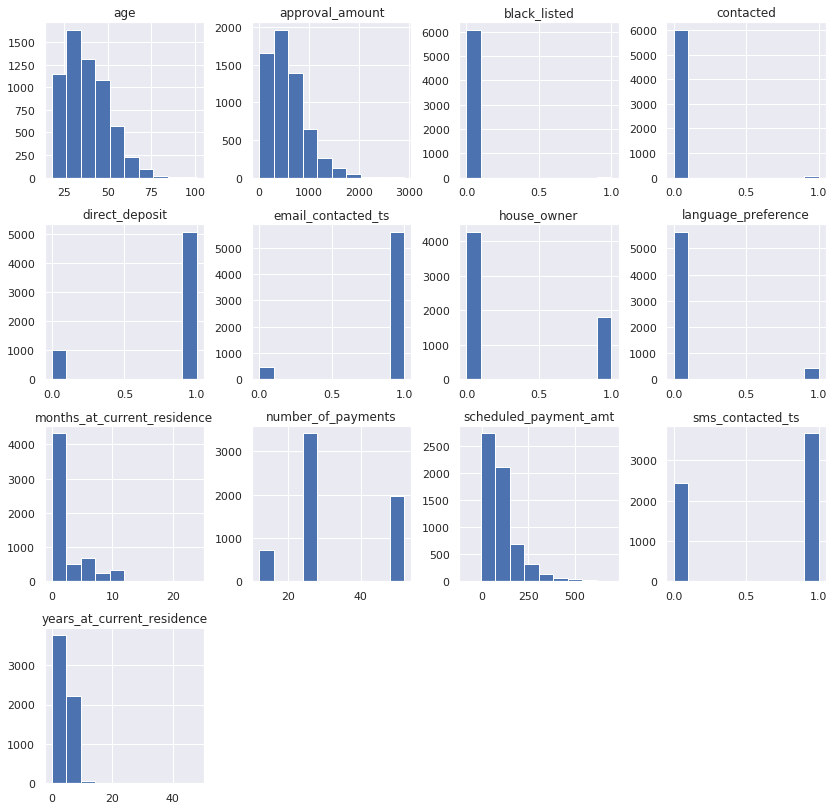

In [23]:
dfp.hist(figsize=(14,14))
plt.show()

## Datos pre procesados

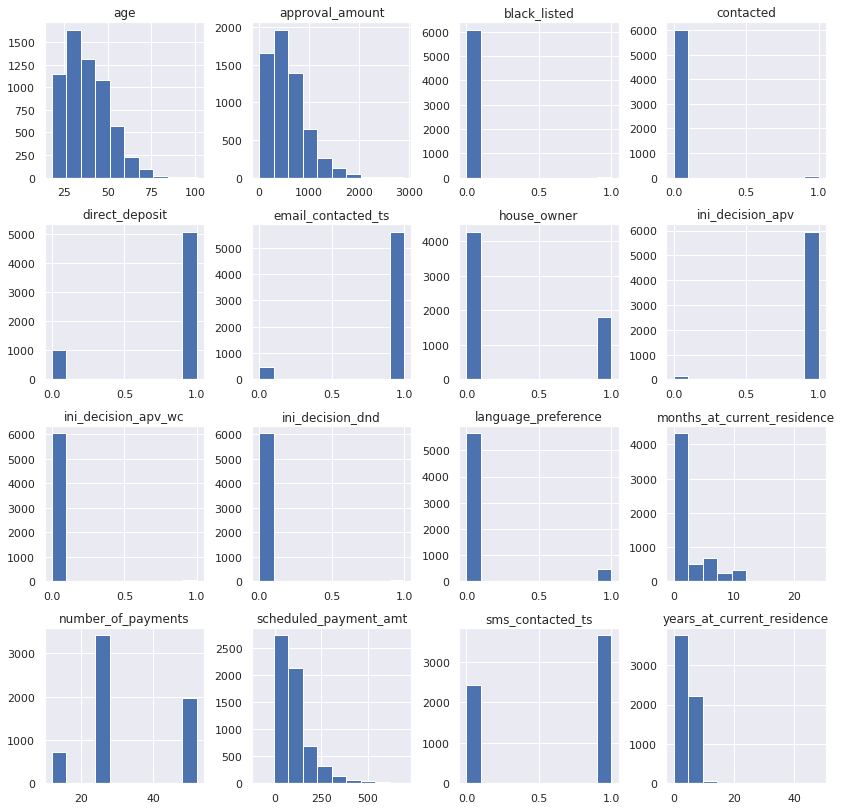

In [24]:
processed_data.hist(figsize=(14,14))
plt.show()

Revisando los datos anteriores podemos notar que la variable "Black Listed" y "contacted" no estan aportando ningun valor a nuestro analysis, procederemos a eliminarlas.

In [25]:
processed_data = processed_data.drop('black_listed', 1)
processed_data = processed_data.drop('contacted', 1)
processed_data.head()

,approval_amount,email_contacted_ts,sms_contacted_ts,house_owner,months_at_current_residence,years_at_current_residence,direct_deposit,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,age,ini_decision_apv,ini_decision_apv_wc,ini_decision_dnd
0,250.0,0,1,0,1,2,1,0,0,18.84,52,31.0,1,0,0
1,80.0,1,0,0,0,1,1,0,0,32.88,26,21.0,1,0,0
2,956.0,1,1,0,0,1,0,1,0,423.50,12,43.0,1,0,0
3,9.0,0,1,0,11,0,0,0,0,18.15,26,33.0,1,0,0
4,250.0,1,1,0,0,6,1,0,0,87.73,26,38.0,1,0,0


### Ofertas canjeadas
El siguiente grafico nos muestra las cantidades de ofertas que fueron aprovechadas y cancelas, contra las que no fueron canjeadas.

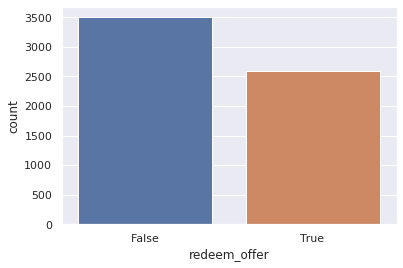

In [26]:
sns.countplot(x='redeem_offer', data=dfp_target);

### Exploracion de ofertas canjeadas por categorias

Analizemos la distribucion de ofertas canjeadas por algunas categorias que consideramos de importancia

#### Renta = 0 y Propietario = 1

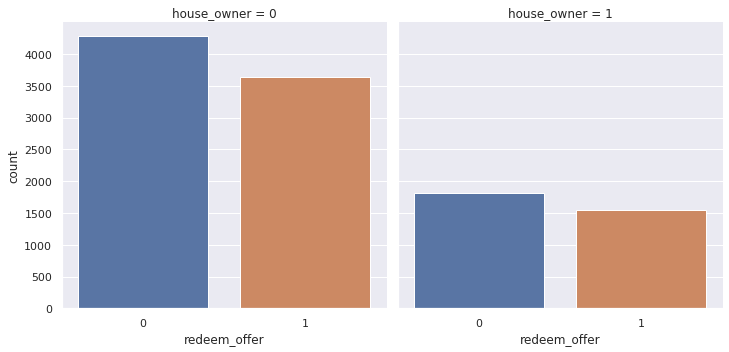

In [27]:
pdy = processed_data.join(dfp_target)
pdy['redeem_offer']=pdy['redeem_offer'].replace({False: 0, True :1})
pdy['scheduled_payment_amt'] = pdy['scheduled_payment_amt'].abs()
pdy['total_months_at_residence'] = (pdy['years_at_current_residence']*12) + pdy['months_at_current_residence']

pdy.head()
sns.catplot(x='redeem_offer', col='house_owner', kind='count', data=pdy);

#### Si recibia su salario por deposito directo

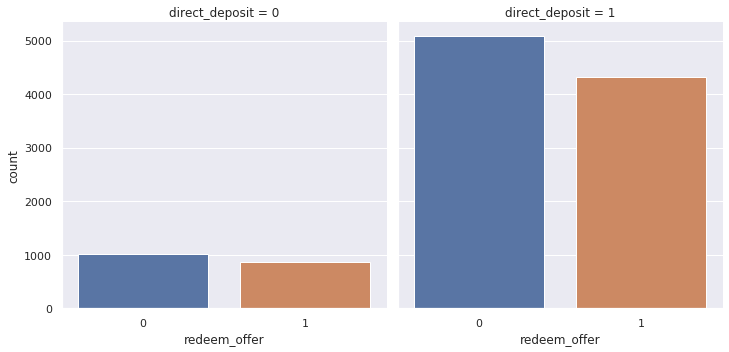

In [28]:
sns.catplot(x='redeem_offer', col='direct_deposit', kind='count', data=pdy);

### Contactados por SMS

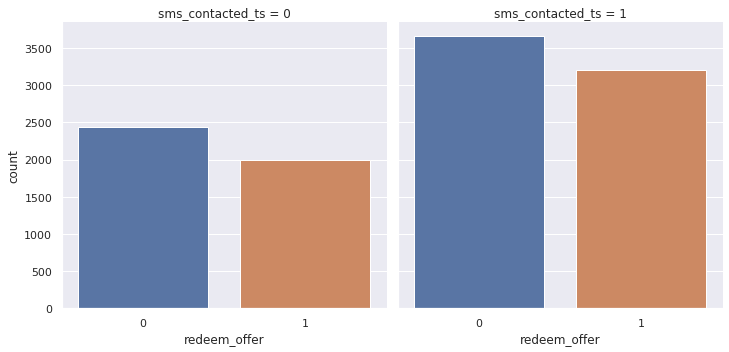

In [29]:
sns.catplot(x='redeem_offer', col='sms_contacted_ts', kind='count', data=pdy);

### Contactados por Email

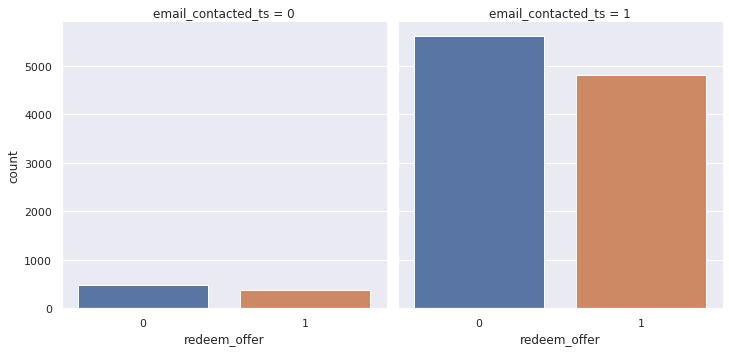

In [30]:
sns.catplot(x='redeem_offer', col='email_contacted_ts', kind='count', data=pdy);

### Funcion de Ploteo y visualizacion de datos

In [31]:
import numpy as np

def plot_points(data):
    X = np.array(data[["total_months_at_residence","approval_amount"]])  #approval_amount scheduled_payment_amt number_of_payments age
    y = np.array(data["redeem_offer"])
    redeem = X[np.argwhere(y==1)]
    delinquent = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in delinquent], [s[0][1] for s in delinquent], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in redeem], [s[0][1] for s in redeem], s = 25, color = 'cyan', edgecolor = 'k')

    plt.xlabel('Months at residence')
    plt.ylabel('Approval Amount')

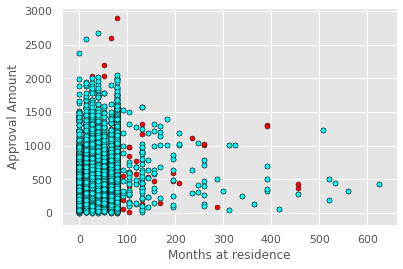

In [32]:
plt.style.use('ggplot')

plot_points(pdy)
plt.show()

Como se puede apreciar en el grafico anterior no es posible visualizar una relacion entre las variables y su distribucion se concentra en su mayoria cerca del origen.
En el siguiente paso haremos una normalizacion y standarizacion para proceder a probar a con varios modelos

### Estandarizacion de los datos

Ahora vamos a estandarizar nuestros datos, despues de lo visto en clase casi todos los algoritmos utilizados obtienen mejores resultados cuando sus datos han sido rescalados y estandarizados,

In [33]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(pdy[['total_months_at_residence', 'approval_amount','scheduled_payment_amt','number_of_payments','age']])
pdy_std = std_scale.transform(pdy[['total_months_at_residence', 'approval_amount','scheduled_payment_amt','number_of_payments','age']])

pdy_std = pd.DataFrame(pdy_std, columns=['total_months_at_residence', 'approval_amount','scheduled_payment_amt','number_of_payments','age'])

pdy_std.index = pdy.index
pdy_std[['email_contacted_ts', 'sms_contacted_ts','house_owner','direct_deposit','language_preference','military_applicant','ini_decision_apv',
         'ini_decision_apv_wc','ini_decision_dnd']] = pdy[['email_contacted_ts', 'sms_contacted_ts','house_owner','direct_deposit','language_preference','military_applicant','ini_decision_apv','ini_decision_apv_wc','ini_decision_dnd']]

pdy_std.head()


,total_months_at_residence,approval_amount,scheduled_payment_amt,number_of_payments,age,email_contacted_ts,sms_contacted_ts,house_owner,direct_deposit,language_preference,military_applicant,ini_decision_apv,ini_decision_apv_wc,ini_decision_dnd
0,-0.493036,-0.813524,-0.984493,1.387065,-0.567948,0,1,0,1,0,0,1,0,0
0,-0.493036,-0.813524,-0.984493,1.387065,-0.567948,0,1,0,1,0,0,1,0,0
0,0.787718,0.687077,0.251798,-0.455635,-0.567948,0,0,1,1,0,0,1,0,0
0,0.787718,0.687077,0.251798,-0.455635,-0.567948,0,0,1,1,0,0,1,0,0
1,-0.813225,-1.272341,-0.828806,-0.455635,-1.394048,1,0,0,1,0,0,1,0,0


In [34]:
pdy_std.shape

(11285, 14)

### Pruebas de entrenamiento con Algoritmos

Haremos algunas pruebas de entrenamiento con algunos algoritmos que consideramos nos pueden dar buenos resultados para clasificar nuestro set de datos.

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pdy_std, pdy['redeem_offer'],
    test_size=0.30, random_state=123)

gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))



Prediction accuracy for the training dataset
46.88%

Prediction accuracy for the test dataset
48.29%



In [36]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.55
Accuracy on test set: 0.52


### Prueba con red neuronal MLP

Intentaremos ahora entrenar nuestros datos con una red neuronal multicapa

In [37]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
import timeit

# Needed to work with keras

y_train = keras.utils.to_categorical(y_train,2)
y_test = keras.utils.to_categorical(y_test,2)

# Building the model

model = Sequential()

model.add(Dense(128, input_dim=14))
model.add(Activation('relu'))
model.add(Dropout(.3)) # now using dropout

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(.2)) # now using dropout


model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Using TensorFlow backend.
W0827 21:11:21.081230 140493663213376 deprecation_wrapper.py:119] From /home/pherrera/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 21:11:21.097827 140493663213376 deprecation_wrapper.py:119] From /home/pherrera/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 21:11:21.102330 140493663213376 deprecation_wrapper.py:119] From /home/pherrera/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 21:11:21.120655 140493663213376 deprecation_wrapper.py:119] From /home/pherrera/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1920      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

### Entrenamiento de red neuronal

In [38]:

start = timeit.default_timer()

model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)

stop = timeit.default_timer()

score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

print('Time: ', stop - start) 

W0827 21:11:21.330859 140493663213376 deprecation.py:323] From /home/pherrera/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


7899/7899 [==============================] - 1s 87us/step

 Training Accuracy: 0.572857323726954
3386/3386 [==============================] - 0s 68us/step

 Testing Accuracy: 0.4515652687888982
Time:  66.17116164101753


In [39]:
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

7899/7899 [==============================] - 1s 75us/step

 Training Accuracy: 0.572857323726954
3386/3386 [==============================] - 0s 61us/step

 Testing Accuracy: 0.4515652687888982
